In [52]:
from config import DBNAME
import pandas as pd 
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3 

In [2]:
pd.set_option('display.max_columns', None)

In [53]:
# ====================
# БАЗОВЫЕ НАСТРОЙКИ
# ====================
plt.rcParams.update({
    # Размер и разрешение
    'figure.figsize': (10, 6),  # Ширина, высота в дюймах
    'figure.dpi': 100,          # Разрешение для экранов
    'savefig.dpi': 300,         # Разрешение для сохранения
    
    # Шрифты и текст
    'font.size': 12,
    'font.family': 'DejaVu Sans',  # Кроссплатформенный шрифт
    'axes.titlesize': 16,          # Заголовок графика
    'axes.labelsize': 14,          # Подписи осей
    'xtick.labelsize': 12,         # Метки оси X
    'ytick.labelsize': 12,         # Метки оси Y
    'legend.fontsize': 11,         # Легенда
    
    # Цвета и линии
    'axes.facecolor': 'white',     # Фон графика
    'figure.facecolor': 'white',   # Фон фигуры
    'axes.edgecolor': 'black',     # Цвет рамки
    'grid.color': '#e0e0e0',       # Цвет сетки
    
    # Оси и сетка
    'axes.grid': True,             # Отображать сетку
    'grid.linestyle': '--',        # Стиль сетки
    'grid.alpha': 0.7,             # Прозрачность сетки
    
    # Легенда
    'legend.frameon': True,        # Рамка вокруг легенды
    'legend.framealpha': 0.9,      # Прозрачность фона
    'legend.edgecolor': 'black',
    
    # Линии
    'lines.linewidth': 2,          # Толщина линий
    'lines.markersize': 8,         # Размер маркеров
    
    # Гистограммы
    'hist.bins': 'auto',           # Автовыбор корзин для гистограмм
})

In [3]:
TABLE_NAME = DBNAME

In [66]:
try:
    with sqlite3.connect(DBNAME) as conn:
        hh_df = pd.read_sql_query(f"SELECT * FROM full_sql", conn)
except Exception as e:
    print(f'❌ Ошибка: Загрузка данных из БД {e}')

In [78]:
hh_df.published_at = pd.to_datetime(hh_df.published_at)

In [45]:
hh_df.sample()

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
68,118899452,Менеджер по бюджетированию и аналитике данных,Middle,Санкт-Петербург,"[59.970173, 30.356984]","[59.9606739, 30.1586551]",2025-07-10 09:56:39+03:00,0,2763991,Полная занятость,"Санкт-Петербург, Чугунная улица, 20",0,1,150000.0,NaN,RUR,0,За месяц,,Экономист,Полный день,,0,От 1 года до 3 лет,Бюджетирование ФОТ; HR-аналитика; Подготовка п...,0,https://hh.ru/vacancy/118899452,Аналитик данных,2025-07-10


In [76]:
hh_df.salary_from.describe()


count       985.000000
mean     122854.041909
std       70088.620129
min       17400.000000
25%       70000.000000
50%      104400.000000
75%      160000.000000
max      500000.000000
Name: salary_from, dtype: float64

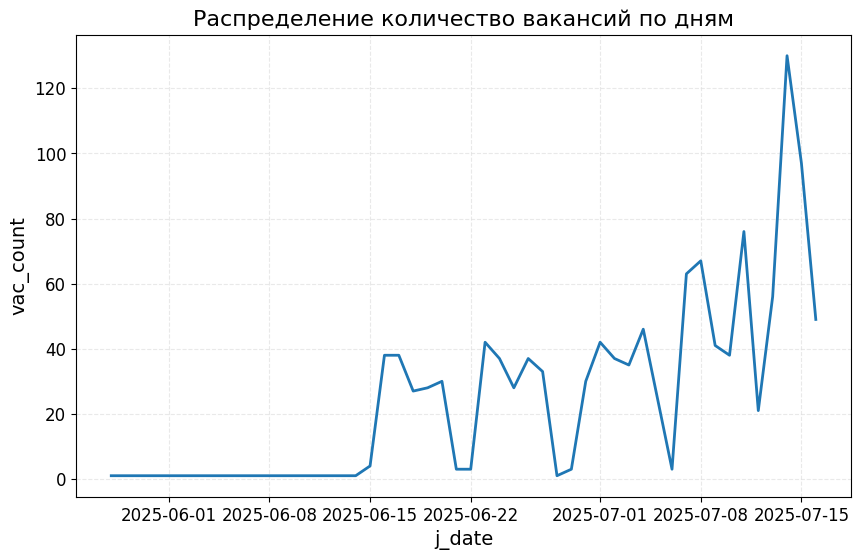

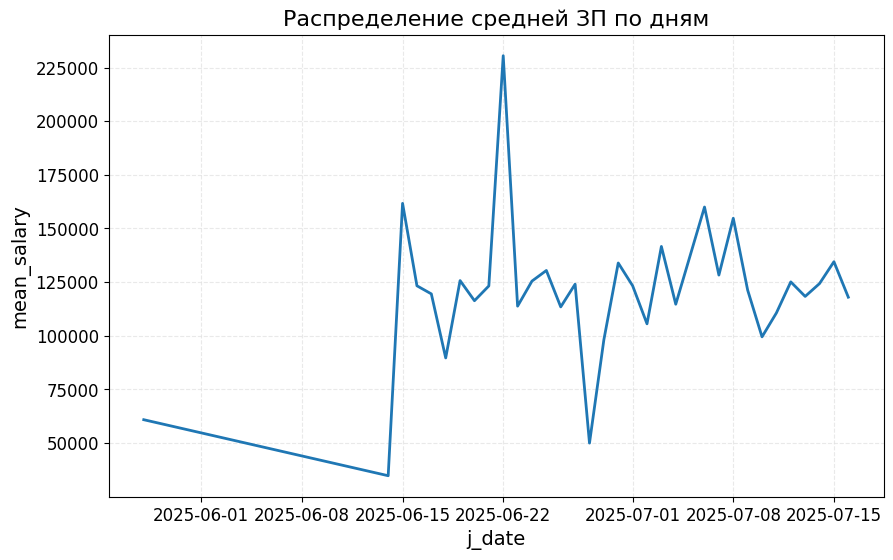

In [79]:
hh_df['j_date'] = hh_df.published_at.dt.date

temp = hh_df.groupby(['j_date']).agg(
    vac_count = ('vac_id','nunique'),
    mean_salary = ('salary_from','mean')
).reset_index().sort_values(by='j_date')

plt.title('Распределение количество вакансий по дням')
sns.lineplot(data=temp, x='j_date', y='vac_count')
plt.show()
plt.title('Распределение средней ЗП по дням')
sns.lineplot(data=temp, x='j_date', y='mean_salary')
plt.show()

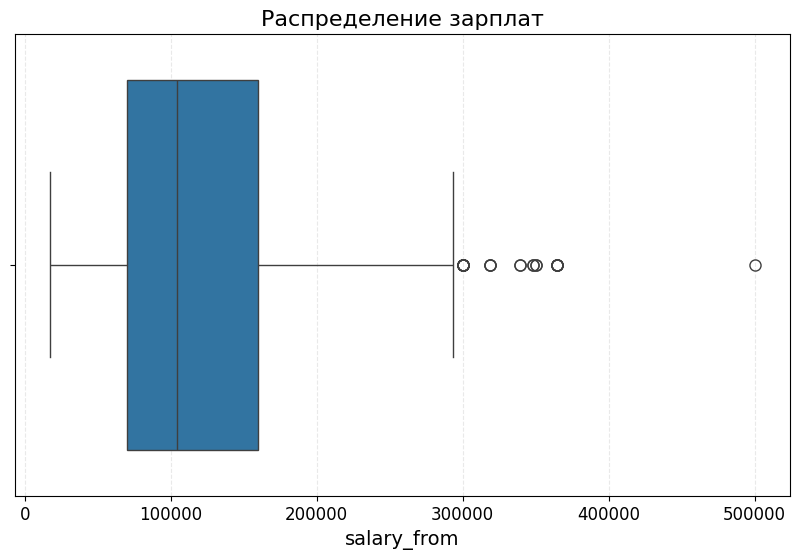

In [89]:
plt.title('Распределение зарплат')
sns.boxplot(data = hh_df, x='salary_from')
plt.show()

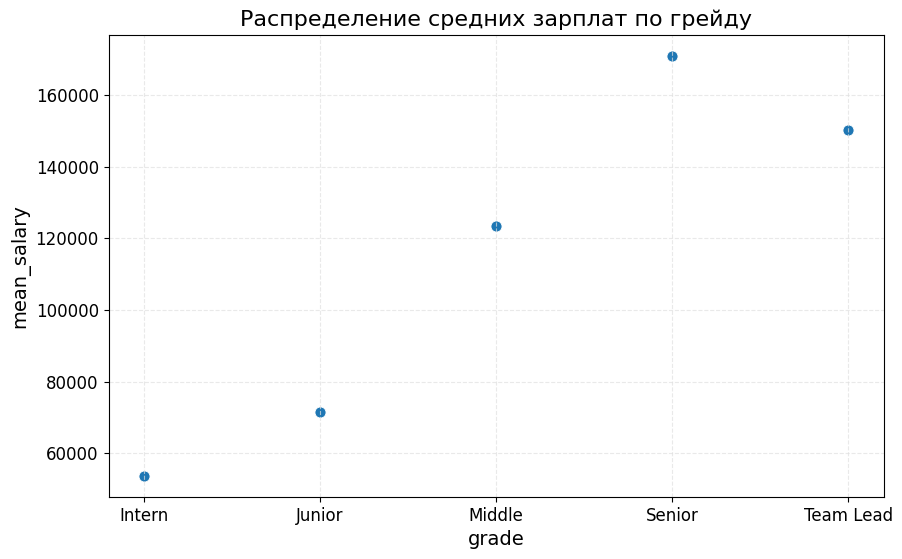

In [99]:
grade_salary = hh_df.groupby(['grade']).agg(
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
).reset_index()

plt.title('Распределение средних зарплат по грейду')
sns.scatterplot(data=grade_salary, y='mean_salary', x='grade');

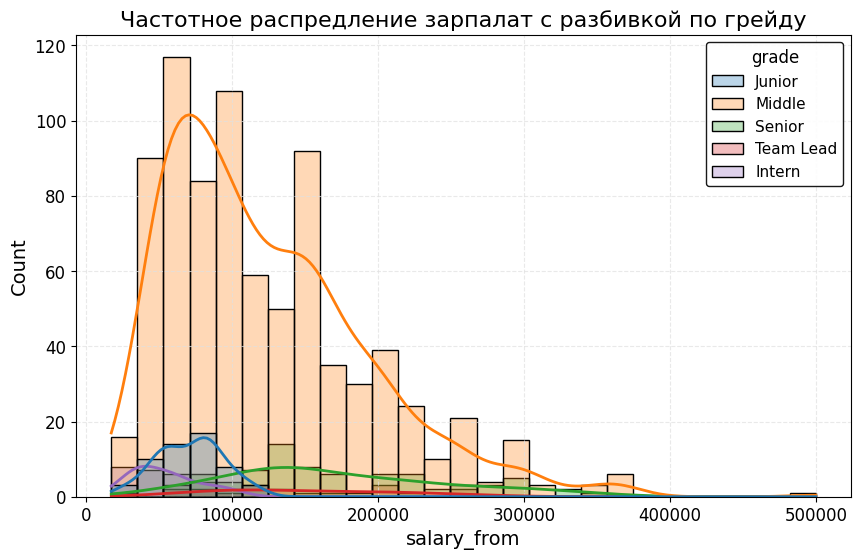

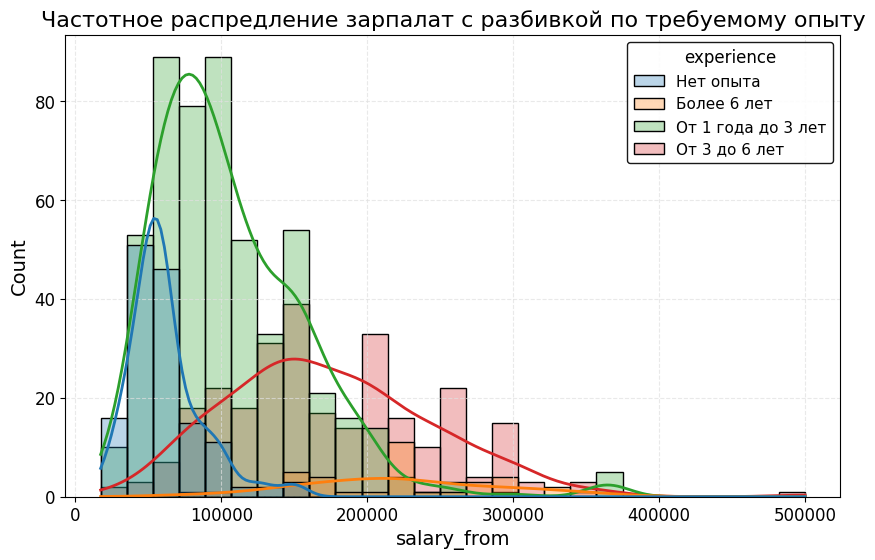

In [111]:
plt.title('Частотное распредление зарпалат с разбивкой по грейду')
sns.histplot(data=hh_df, x='salary_from', hue='grade', kde=True,  alpha=0.3)
plt.show()
plt.title('Частотное распредление зарпалат с разбивкой по требуемому опыту')
sns.histplot(data=hh_df, x='salary_from', hue='experience', kde=True, alpha=0.3);
plt.show()